In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no Null values in the Columns

In [7]:
total = (df['Churn']=='Yes').sum()+(df['Churn']=='No').sum()
No_Percent=((df['Churn']=='No').sum()/total)*100
Yes_Percent=((df['Churn']=='Yes').sum()/total)*100
print("Churn Percent : NO is = {} and Yes is = {}".format(No_Percent,Yes_Percent))

Churn Percent : NO is = 73.42150170648463 and Yes is = 26.578498293515356


In [8]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7027    1990.50
7028    7362.90
7029     346.45
7030     306.60
7031    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

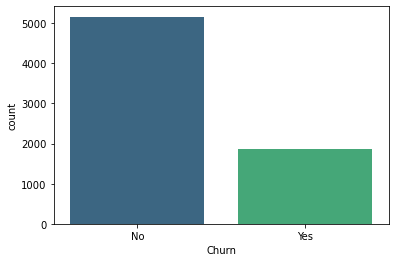

In [9]:
sns.countplot(data=df , x = 'Churn' , palette='viridis')

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

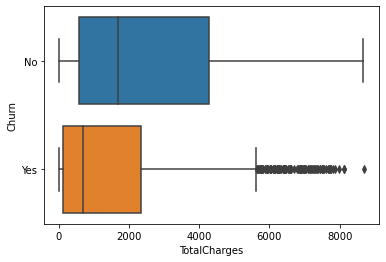

In [10]:
sns.boxplot(data=df, x='TotalCharges', y='Churn')

From above Box Plot we can see that Churning is increased when the Total charges are above 6000

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

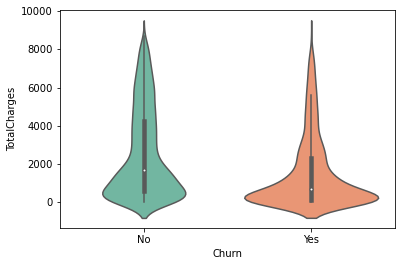

In [11]:
sns.violinplot(data=df, y='TotalCharges', x='Churn', palette='Set2')

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

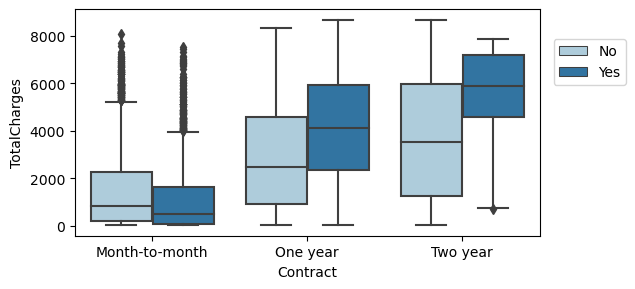

In [13]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(data=df, y='TotalCharges' , x= 'Contract' , hue= 'Churn' , palette='Paired')
plt.legend(bbox_to_anchor=(1.2,0.9))

From above Box Plot we can see that in Month to month contract churn is more if the charges are above 6000 and paralelly we can say Churn is less if the total charges is between 2000 to 6000 in a one year and two year contracts

In [14]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']])

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

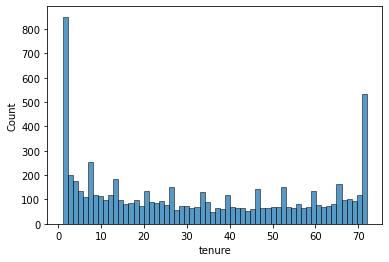

In [16]:
sns.histplot(data = df , x = 'tenure',bins= 60)

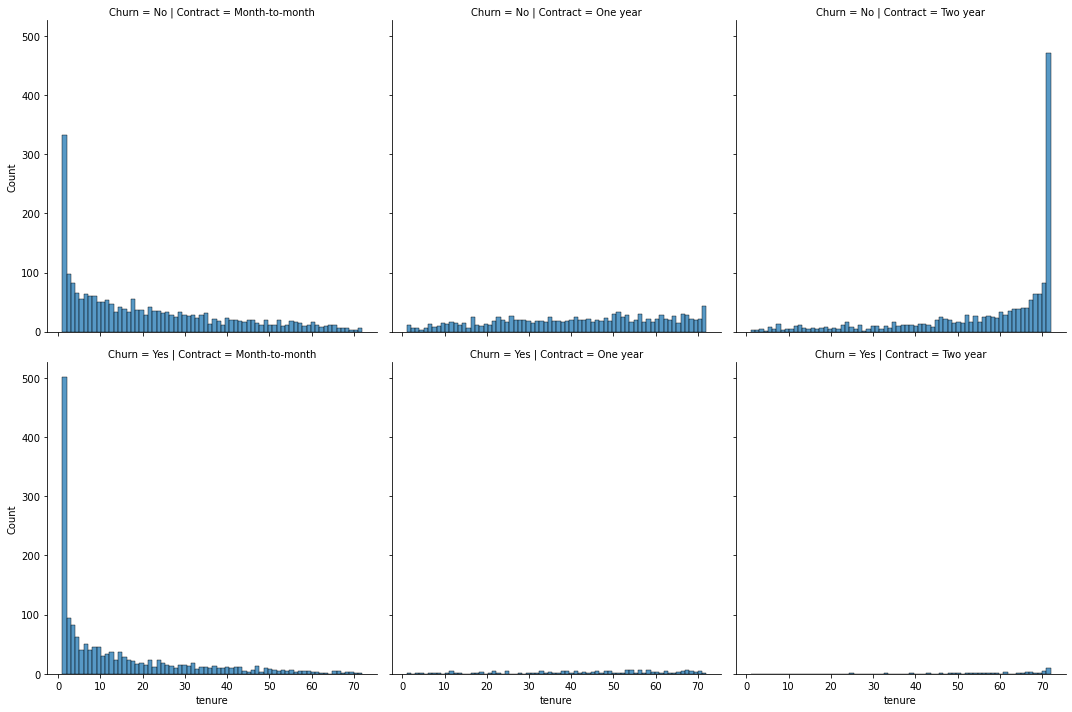

In [17]:
sns.displot(data =df , x='tenure', bins=70,col='Contract',row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

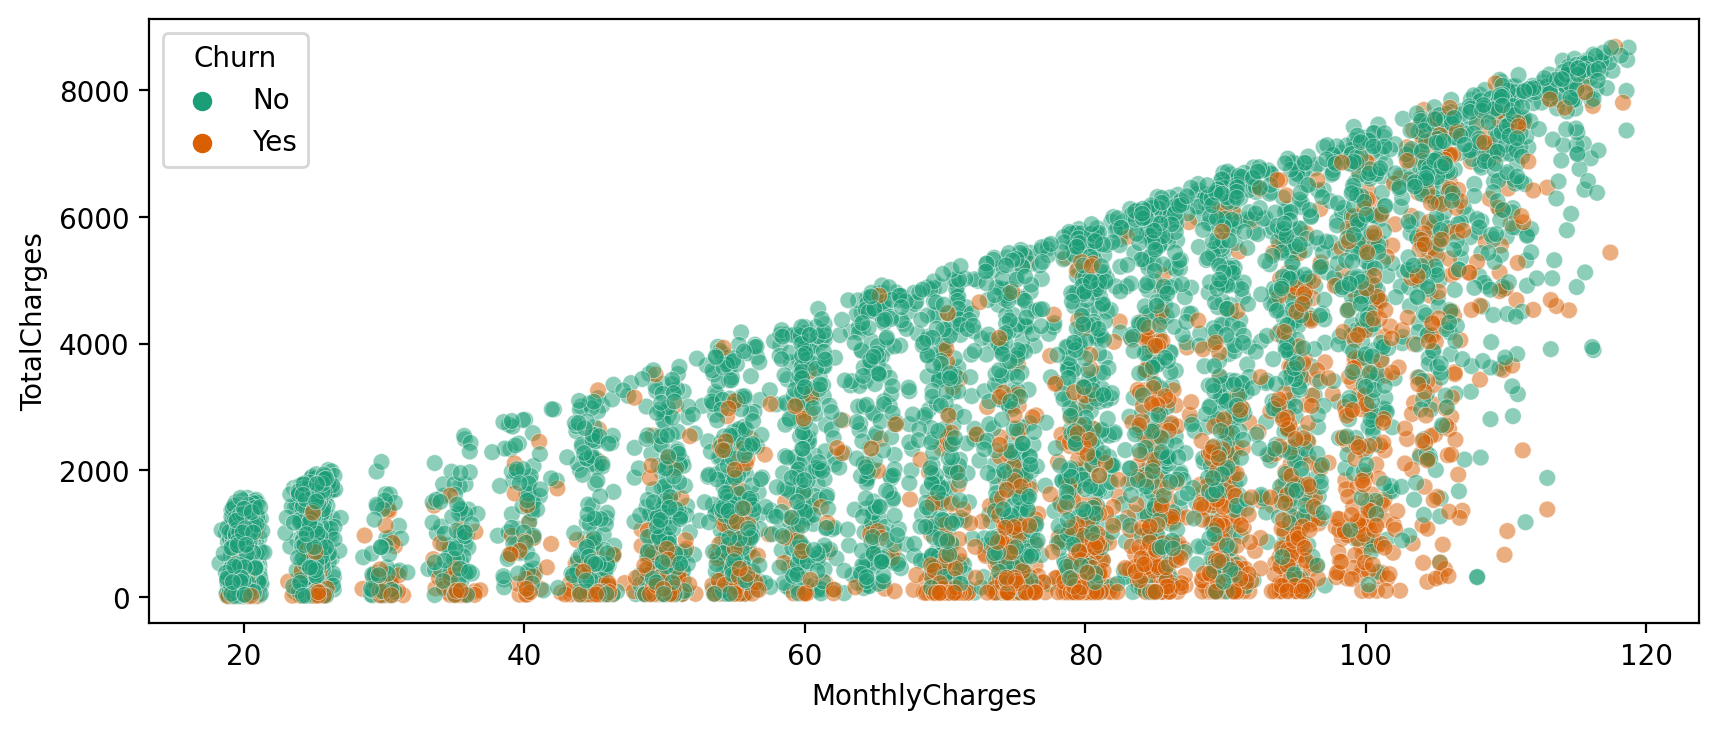

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5,linewidth=0.3,palette='Dark2')

<AxesSubplot:xlabel='tenure'>

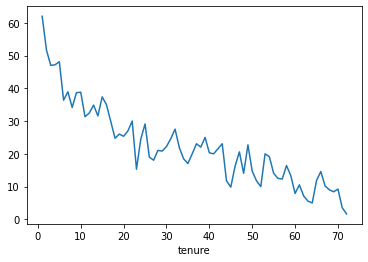

In [19]:
No_churn = df.groupby(['Churn','tenure']).count().T['No']
yes_churn = df.groupby(['Churn','tenure']).count().T['Yes']
churn_rate = 100*yes_churn/(No_churn+yes_churn)
churn_rate.T['customerID'].plot()

In [20]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure <25:
        return '12-24 Months'
    elif tenure <49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [21]:
df['Tenure cohort']= df['tenure'].apply(cohort)

In [22]:
df['Tenure cohort'].value_counts()

Over 48 Months    2239
0-12 Months       2175
24-48 Months      1594
12-24 Months      1024
Name: Tenure cohort, dtype: int64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

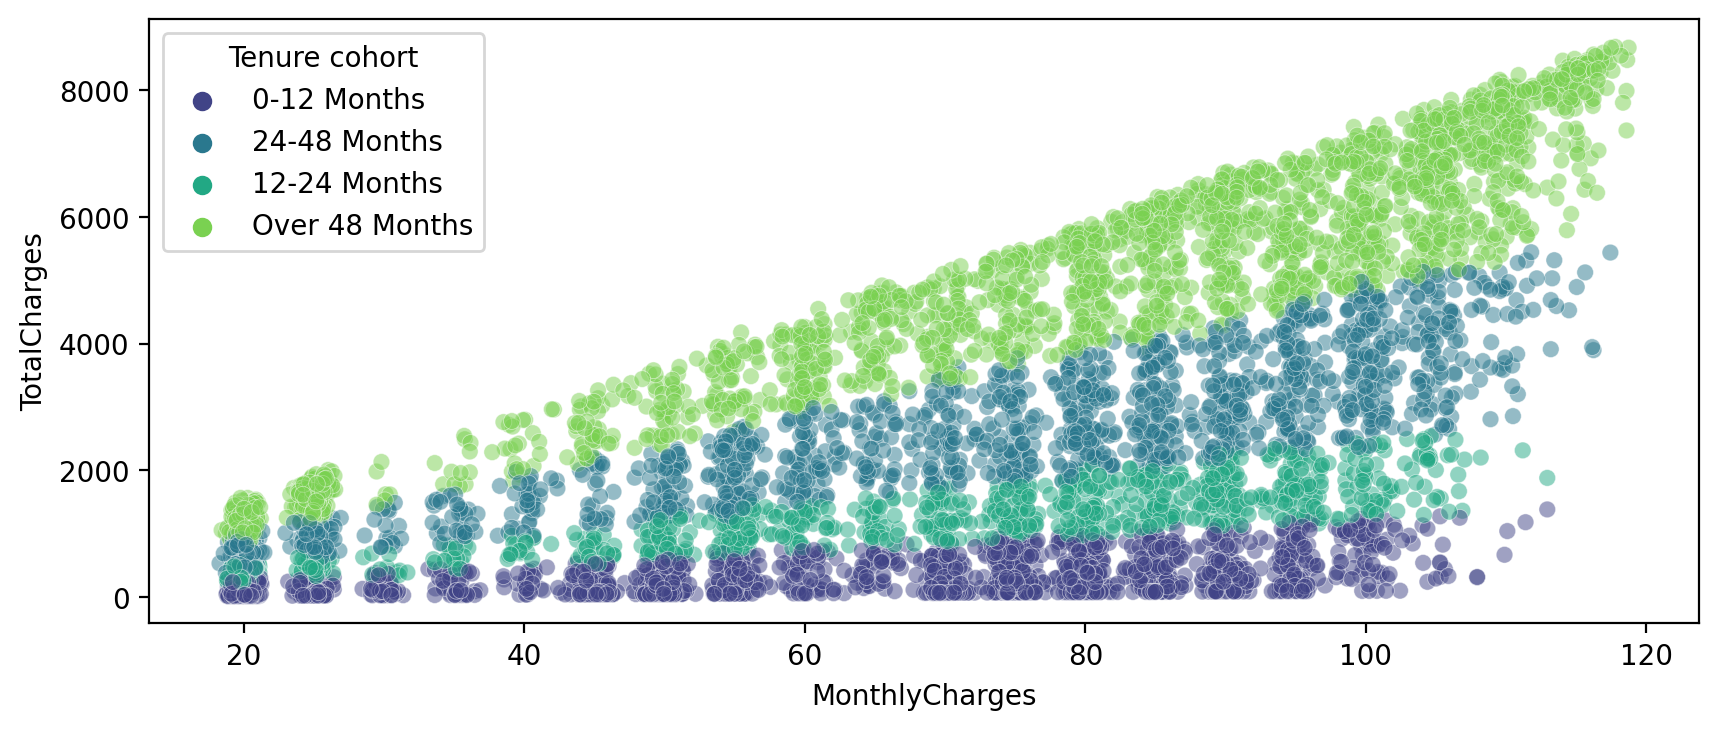

In [23]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Tenure cohort',alpha=0.5,linewidth=0.3,palette='viridis')

<AxesSubplot:xlabel='Tenure cohort', ylabel='count'>

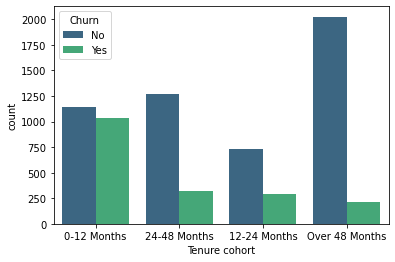

In [24]:
sns.countplot(data=df , x ='Tenure cohort',hue= 'Churn', palette='viridis')

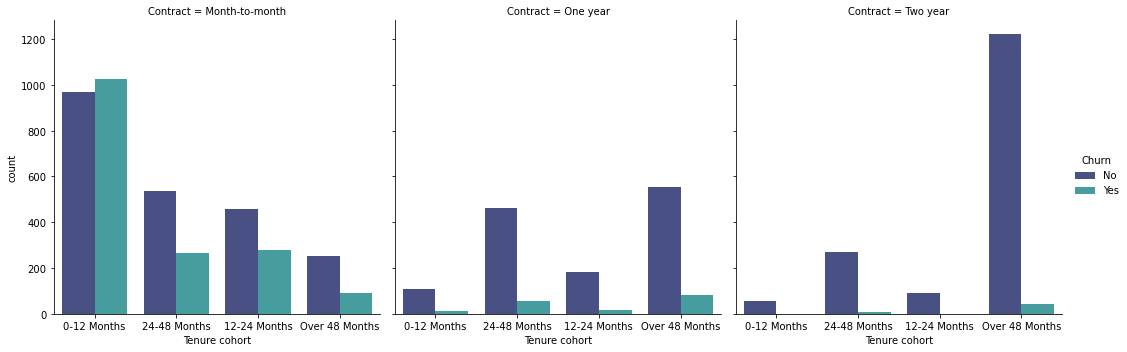

In [25]:
sns.catplot(data=df , x = 'Tenure cohort', hue='Churn', kind ='count', col = 'Contract', palette='mako')

In [26]:
X = df.drop(['Churn' , 'customerID'] , axis = 1)
X = pd.get_dummies(X , drop_first=True)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train , y_train)
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix , accuracy_score , classification_report
preds = dt.predict(X_test)
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [28]:
cm= confusion_matrix(y_test, preds)
print (cm)

[[498  59]
 [ 75  72]]


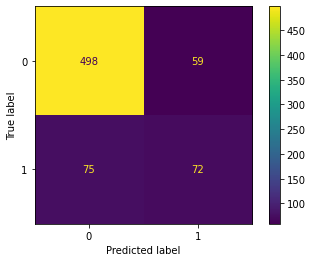

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

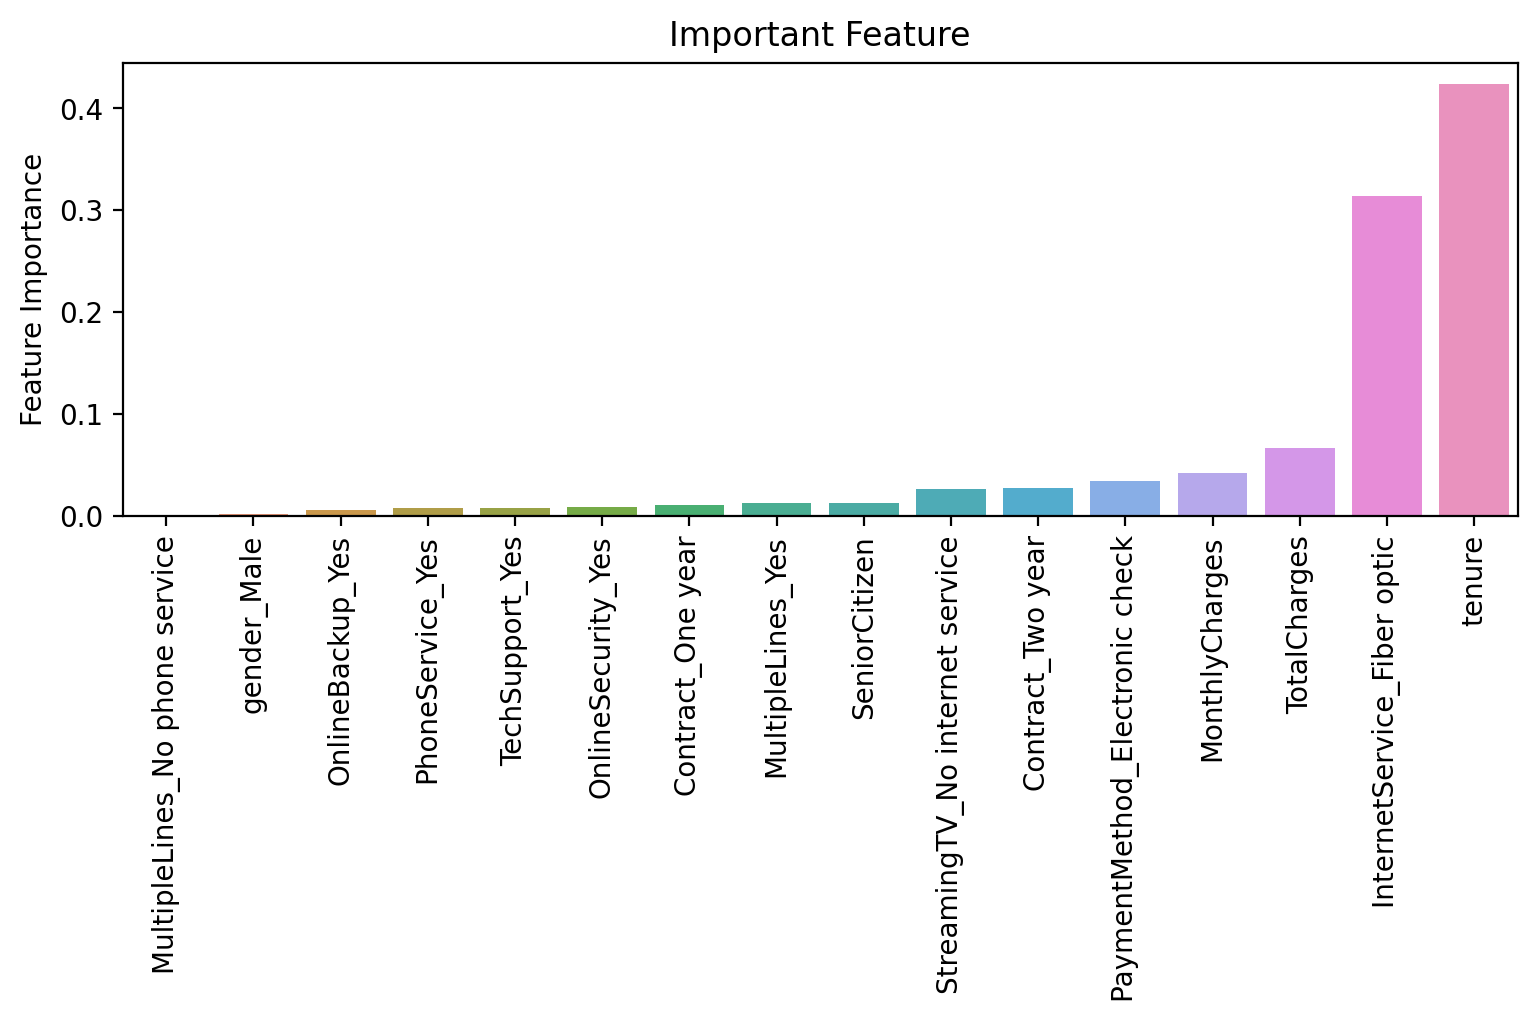

In [30]:
imp_feat = pd.DataFrame(data = dt.feature_importances_ , index = X.columns , columns = ['Feature Importance'])
imp_feat = imp_feat.sort_values('Feature Importance')
imp_feat = imp_feat[imp_feat['Feature Importance'] >0]
plt.figure(figsize=(9,3),dpi=200)
sns.barplot(data = imp_feat , x = imp_feat.index , y = 'Feature Importance')
plt.title('Important Feature')
plt.xticks(rotation=90);

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
preds = rf.predict(X_test)
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87       557
         Yes       0.49      0.46      0.47       147

    accuracy                           0.79       704
   macro avg       0.67      0.67      0.67       704
weighted avg       0.78      0.79      0.78       704



In [32]:
cm2= confusion_matrix(y_test, preds)
print (cm2)

[[485  72]
 [ 79  68]]


In [33]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100)
gb_model = GradientBoostingClassifier()
ada_model.fit(X_train , y_train)
gb_model.fit(X_train , y_train)
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [34]:
print(classification_report(y_test , ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [35]:
cmada=confusion_matrix(y_test,ada_preds)
cmgb=confusion_matrix(y_test,gb_preds)
print('Confusion Matrix for AdaBoost:', cmada)
print('Confusion Matrix for Gradient Boosting:', cmgb)

Confusion Matrix for AdaBoost: [[511  46]
 [ 69  78]]
Confusion Matrix for Gradient Boosting: [[503  54]
 [ 74  73]]


In [36]:
print(classification_report(y_test , gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



From the evaluation results of above models, we can see that AdaBoost is performing well in predicting True Postive Labels well

In [39]:
import pickle
filename = 'model.pkl'
pickle.dump(ada_model, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score = load_model.score(X_test, y_test)

In [41]:
model_score

0.8366477272727273